In [3]:
%matplotlib inline
#%matplotlib notebook

from ipywidgets import interact, interactive, fixed, interact_manual,Play
import ipywidgets as widgets
import matplotlib.colors as colors
import matplotlib as mpl
import pylab
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
import math
import os
import scipy.special as sp
import scipy.integrate as integrate
import scipy.misc as ms
from matplotlib import gridspec
from numpy import linalg as LA
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
import warnings
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Rectangle, Circle
from scipy import optimize
from tqdm import tqdm

from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

warnings.filterwarnings('ignore')

In [4]:

pgf_with_latex = {                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": 18,               # LaTeX default is 10pt font.
    #"text.fontsize": 18,
    "legend.fontsize": 16,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "pgf.preamble": [
        r"\usepackage{bm}",  
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        r"\usepackage{amsmath}"
        ]
    }
mpl.rcParams.update(pgf_with_latex)


In [5]:
def x1_sol(t,m1,v1,xs1):
    return ((v1 + m1*xs1)*np.exp(m1*t) - v1)/m1
def x2_sol(t,m2,v2,xs2):
    return ((v2 + m2*xs2)*np.exp(m2*t) - v2)/m2
def x1_dot(t,m1,v1,xs1):
    return np.exp(m1 *t)*(v1 + m1 *xs1)
def x2_dot(t,m2,v2,xs2):
    return np.exp(m2 *t)*(v2 + m2 *xs2)
def x1_dotdot(t,m1,v1,xs1):
    return m1*np.exp(m1 *t)*(v1 + m1 *xs1)
def x2_dotdot(t,m2,v2,xs2):
    return m2*np.exp(m2 *t)*(v2 + m2 *xs2)

100%|████████████████████████████████████████████████████████████████████████████████| 201/201 [32:31<00:00,  9.71s/it]


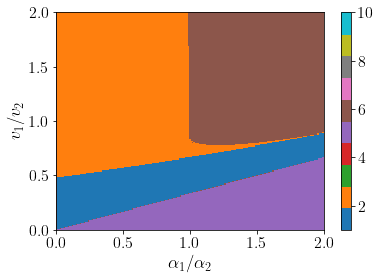

In [6]:
l_x1= -1/3
l_x2= -1/2

def catchtime(time):
    return x1_sol(time,l_m1,l_v1,l_x1)-x2_sol(time,l_m2,l_v2,l_x2)
def catchtime_prime(time):
    return x1_dot(time,l_m1,l_v1,l_x1)-x2_dot(time,l_m2,l_v2,l_x2)
def catchtime_prime2(time):
    return x1_dotdot(time,l_m1,l_v1,l_x1)-x2_dotdot(time,l_m2,l_v2,l_x2)
def catch_pos(time):
    return x1_sol(time,l_m1,l_v1,l_x1)

interval=0.01
v1_list=np.arange(0.0,2.0+interval,interval)
m1_list=np.arange(0.0,2.0+interval,interval)

x, y = np.meshgrid(m1_list, v1_list)
l_m2=1 # fix
l_v2=1 # fix

z = np.zeros(np.shape(x))

with tqdm(total=len(v1_list)) as pbar:
    for i,l_v1 in enumerate(v1_list):
        l_v1=v1_list[i]
        pbar.update(1)
        for j,l_m1 in enumerate(m1_list):
            l_m1=m1_list[j]
            
            if l_m1>1.0:
                initial_t=0
            else:
                initial_t=100   
            
            catch_times, converged = optimize.newton(catchtime, initial_t, fprime=catchtime_prime, fprime2=catchtime_prime2, maxiter=5000, full_output=True, disp=False)
            #case caught 1
            if catch_times <=0:
                z[i,j] = 6
            elif catch_pos(catch_times) > l_x1 and catch_pos(catch_times) < 0:
                z[i,j] = 1
            #case caught 2
            elif catch_pos(catch_times) > 0.0:
                z[i,j] = 2
            #case caught 5
            elif catch_pos(catch_times) < l_x1:
                z[i,j] = 5
            #case caught 6
            else:
                z[i,j] = 6

fig, ax = plt.subplots()
plt.pcolormesh(x,y,z, cmap="tab10", vmin=1,vmax=10)
plt.colorbar()

# plt.plot(1.0, range(1.0,2.0), c="black")
#plt.plot(l_m1,catch_pos(0), "--")

#plt.title("Catching Position with Different Velocities")
plt.xlim(0,2.0,0.5)
plt.ylim(0,2.0,0.25)
#plt.legend(frameon=False)
plt.xlabel("$\\alpha_1$/$\\alpha_2$")
plt.ylabel("$v_1$/$v_2$")
#plt.savefig("Regions_Final.png", dpi=300, bbox_inches='tight')

plt.show()



In [12]:
plt.plot(1.0, range(1.0,2.0), c="black")
plt.plot(l_m1,catch_pos(0), "--")


TypeError: 'float' object cannot be interpreted as an integer